In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing

### Raw data

In [99]:
pd.set_option('display.max_column', None)

In [100]:
raw_df = pd.read_csv('telecom_churn_data.csv')
raw_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [101]:
raw_df.shape

(99999, 226)

In [102]:
raw_df.duplicated().sum()

0

In [103]:
raw_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

### Data Transformation

In [104]:
# define high-value customer based on average recharge amount
avg_two_month = (raw_df['total_rech_amt_6'] + raw_df['total_rech_amt_7'])
high_value = np.percentile(avg_two_month,70)
print(high_value)

737.0


In [114]:
# create highe-value customer dataset
high_cus = raw_df[(raw_df['total_rech_amt_6'] + raw_df['total_rech_amt_7'])>=high_value]
high_cus.shape

(30011, 226)

In [106]:
# Tag churners 
tag = high_cus.apply(lambda x: 0 if (x['total_ic_mou_9'] + x['total_og_mou_9'] + x['vol_2g_mb_9']+\
                     x['vol_3g_mb_9'] > 0) else 1 , axis=1)
tag.value_counts(normalize=True)

0    0.913598
1    0.086402
Name: proportion, dtype: float64

In [177]:
# set index cho target varriable
tag= tag.set_axis(high_cus['mobile_number'])
tag

mobile_number
7000701601    1
7001524846    0
7002191713    0
7000875565    0
7000187447    0
             ..
7001386760    0
7001453306    0
7001729035    0
7002111859    0
7000498689    0
Length: 30011, dtype: int64

In [11]:
# Remove attributes of the churn phase
drop_col = [col for col in high_cus.columns if col.endswith('_9') ]
high_cus=high_cus.drop(columns = drop_col)
high_cus.head(2)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.00,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.

In [12]:
# Set index for new dataset
high_cus.set_index('mobile_number', inplace=True)

In [13]:
# New data include 30k samples and 171 attributes
high_cus.shape

(30011, 171)

In [14]:
high_cus.describe()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,30011.0,29897.0,29897.0,29897.0,30011.000000,30011.000000,30011.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.0,29708.0,29073.0,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,30011.000000,30011.000000,30011.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.0,29708.0,29073.0,29695.000000,29708.000000,29073.000000,30011.000000,30011.000000,30011.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,11397.000000,11662.000000,11754.000000,11397.000000,11662.000000,11754.000000,11397.000000,11662.000000,11754.000000,11397.000000,11662.000000,11754.000000,11397.000000,11662.000000,11754.000000,30011.000000,30011.000000,30011.000000,30011.000

In [15]:
high_cus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30011 entries, 7000701601 to 7000498689
Columns: 171 entries, circle_id to sep_vbc_3g
dtypes: float64(136), int64(26), object(9)
memory usage: 39.4+ MB


high_cus contain object columns, check them  -> change str values to datetime ones

In [16]:
high_cus.select_dtypes(object)

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
mobile_number,,,,,,,,,
7000701601,6/30/2014,7/31/2014,8/31/2014,6/27/2014,7/25/2014,8/26/2014,NaN,NaN,NaN
7001524846,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/31/2014,8/30/2014,NaN,7/31/2014,8/23/2014
7002191713,6/30/2014,7/31/2014,8/31/2014,6/20/2014,7/22/2014,8/30/2014,NaN,NaN,8/30/2014
7000875565,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/31/2014,8/14/2014,NaN,NaN,NaN
7000187447,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/30/2014,8/25/2014,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
7001386760,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/29/2014,8/23/2014,6/26/2014,7/27/2014,NaN
7001453306,6/30/2014,7/31/2014,8/31/2014,6/29/2014,7/27/2014,8/23/2014,NaN,NaN,NaN
7001729035,6/30/2014,7/31/2014,8/31/2014,6/20/2014,7/28/2014,8/18/2014,6/17/2014,7/18/2014,8/14/2014


In [17]:
# Split dataset based on data type
date_data = high_cus.select_dtypes(include='object')
num_data= high_cus.select_dtypes(exclude='object')

### Missing value

In [18]:
# with numeric data, remove columns contain high missing rate. with others, fill with mean value
miss_stt = round(num_data.isna().sum()/num_data.shape[0],2)
miss_stt[miss_stt>0.5]

total_rech_data_6     0.62
total_rech_data_7     0.61
total_rech_data_8     0.61
max_rech_data_6       0.62
max_rech_data_7       0.61
max_rech_data_8       0.61
count_rech_2g_6       0.62
count_rech_2g_7       0.61
count_rech_2g_8       0.61
count_rech_3g_6       0.62
count_rech_3g_7       0.61
count_rech_3g_8       0.61
av_rech_amt_data_6    0.62
av_rech_amt_data_7    0.61
av_rech_amt_data_8    0.61
arpu_3g_6             0.62
arpu_3g_7             0.61
arpu_3g_8             0.61
arpu_2g_6             0.62
arpu_2g_7             0.61
arpu_2g_8             0.61
night_pck_user_6      0.62
night_pck_user_7      0.61
night_pck_user_8      0.61
fb_user_6             0.62
fb_user_7             0.61
fb_user_8             0.61
dtype: float64

In [19]:
# Remove high-rate missing columns
num_data=num_data.drop(columns = miss_stt[miss_stt>0.5].index)

In [20]:
# fill with mean
num_data=num_data.fillna(num_data.mean())
num_data.isna().sum().sum()

0

In [21]:
# Handle with datetime data.
miss_stt = round(date_data.isna().sum()/date_data.shape[0],4)
miss_stt

last_date_of_month_6        0.0000
last_date_of_month_7        0.0010
last_date_of_month_8        0.0052
date_of_last_rech_6         0.0021
date_of_last_rech_7         0.0038
date_of_last_rech_8         0.0198
date_of_last_rech_data_6    0.6202
date_of_last_rech_data_7    0.6114
date_of_last_rech_data_8    0.6083
dtype: float64

In [22]:
# Convert to datetime and get the day to convert these attributes to numemric
dt_data = pd.DataFrame(columns = date_data.columns)
for att in date_data:
    dt_data[att] = pd.to_datetime(date_data[att], format='%m/%d/%Y', errors='coerce').dt.day


In [23]:
date_data.head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
mobile_number,,,,,,,,,
7000701601,6/30/2014,7/31/2014,8/31/2014,6/27/2014,7/25/2014,8/26/2014,NaN,NaN,NaN
7001524846,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/31/2014,8/30/2014,NaN,7/31/2014,8/23/2014
7002191713,6/30/2014,7/31/2014,8/31/2014,6/20/2014,7/22/2014,8/30/2014,NaN,NaN,8/30/2014
7000875565,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/31/2014,8/14/2014,NaN,NaN,NaN
7000187447,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/30/2014,8/25/2014,NaN,NaN,NaN


In [24]:
# fill nan with mean value
dt_data=dt_data.fillna(dt_data.mean().round(0))
dt_data.isna().sum()

last_date_of_month_6        0
last_date_of_month_7        0
last_date_of_month_8        0
date_of_last_rech_6         0
date_of_last_rech_7         0
date_of_last_rech_8         0
date_of_last_rech_data_6    0
date_of_last_rech_data_7    0
date_of_last_rech_data_8    0
dtype: int64

In [25]:
#final data
total_data = pd.concat([num_data, dt_data], axis=1)

In [26]:
# scale data 
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_data = scaler.fit_transform(total_data)
scaled_df = pd.DataFrame(scaled_data, columns=total_data.columns)
scaled_df.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,0.0,0.0,0.0,0.0,1.088501,1.643402,5.356252,-0.524942,-0.525732,-0.482565,0.066259,0.286635,-0.129491,-0.017289,0.259928,0.240979,-0.049723,-0.098784,0.149737,-0.187194,-0.263475,-0.212094,0.502836,1.100986,-0.046017,2.431231,2.124733,2.304871,-0.229965,-0.203297,-0.239208,0.359505,0.658880,-0.038161,-0.458097,-0.417706,-0.405377,-0.376241,-0.420272,-0.327855,0.371550,1.350326,1.268197,0.0,0.0,0.0,-0.558902,-0.541501,-0.468450,-0.049841,-0.044936,0.176708,-0.079486,-0.325388,-0.026568,-0.306941,-0.017538,-0.018384,-0.301611,-0.145804,-0.398872,-0.071556,-0.231921,-0.262510,0.254071,0.269788,-0.173720,2.978261,1.714510,0.558035,0.581538,0.334085,-0.176893,0.259857,-0.061838,0.205202,0.584822,0.881047,1.045149,2.473405,1.522108,0.959489,0.0,0.0,0.0,0.917881,0.799357,1.025003,0.883137,0.657827,0.369969,0.734280,-0.100314,-0.245155,-0.137035,0.026549,0.260510,1.039490,0.889166,1.075619,-0.746205,-0.719750,-0.340280,1.636578,0.167286,5.025429,8.062871,3.383998,8.210351,-0.731873,-0.745945,4.704367,-0.284238,-0.278858,-0.257772,-0.298313,-0.325002,-0.314057,-0.333384,-0.338827,-0.319253,-0.294406,-0.308975,-0.329433,-0.302821,-0.298404,-0.297129,-0.157526,-0.154974,-0.144058,-0.473793,-0.183623,-0.283682,-0.263319,-0.13493,0.0,0.0,0.0,0.042301,-0.575868,-0.180879,0.036169,-0.028580,0.001797
1,0.0,0.0,0.0,0.0,-0.471101,-0.209364,-0.807505,0.249057,0.090648,-0.519650,-0.699359,-0.717286,-0.530227,-0.222392,-0.179053,-0.183646,-0.250010,-0.227386,-0.208734,0.851244,0.487553,-0.330755,-0.409933,-0.468877,-0.525750,-0.311366,-0.317563,-0.332103,-0.229965,-0.203297,0.728179,0.243181,0.003135,-0.568398,-0.183785,-0.160150,-0.379525,-0.463902,-0.469928,-0.263955,-0.163154,-0.153947,-0.157961,0.0,0.0,0.0,-0.444216,-0.434057,-0.435101,-0.049841,-0.048882,-0.046766,-0.321278,-0.325388,0.136602,-0.306941,-0.017538,-0.018384,-0.270067,-0.4

### Correlation

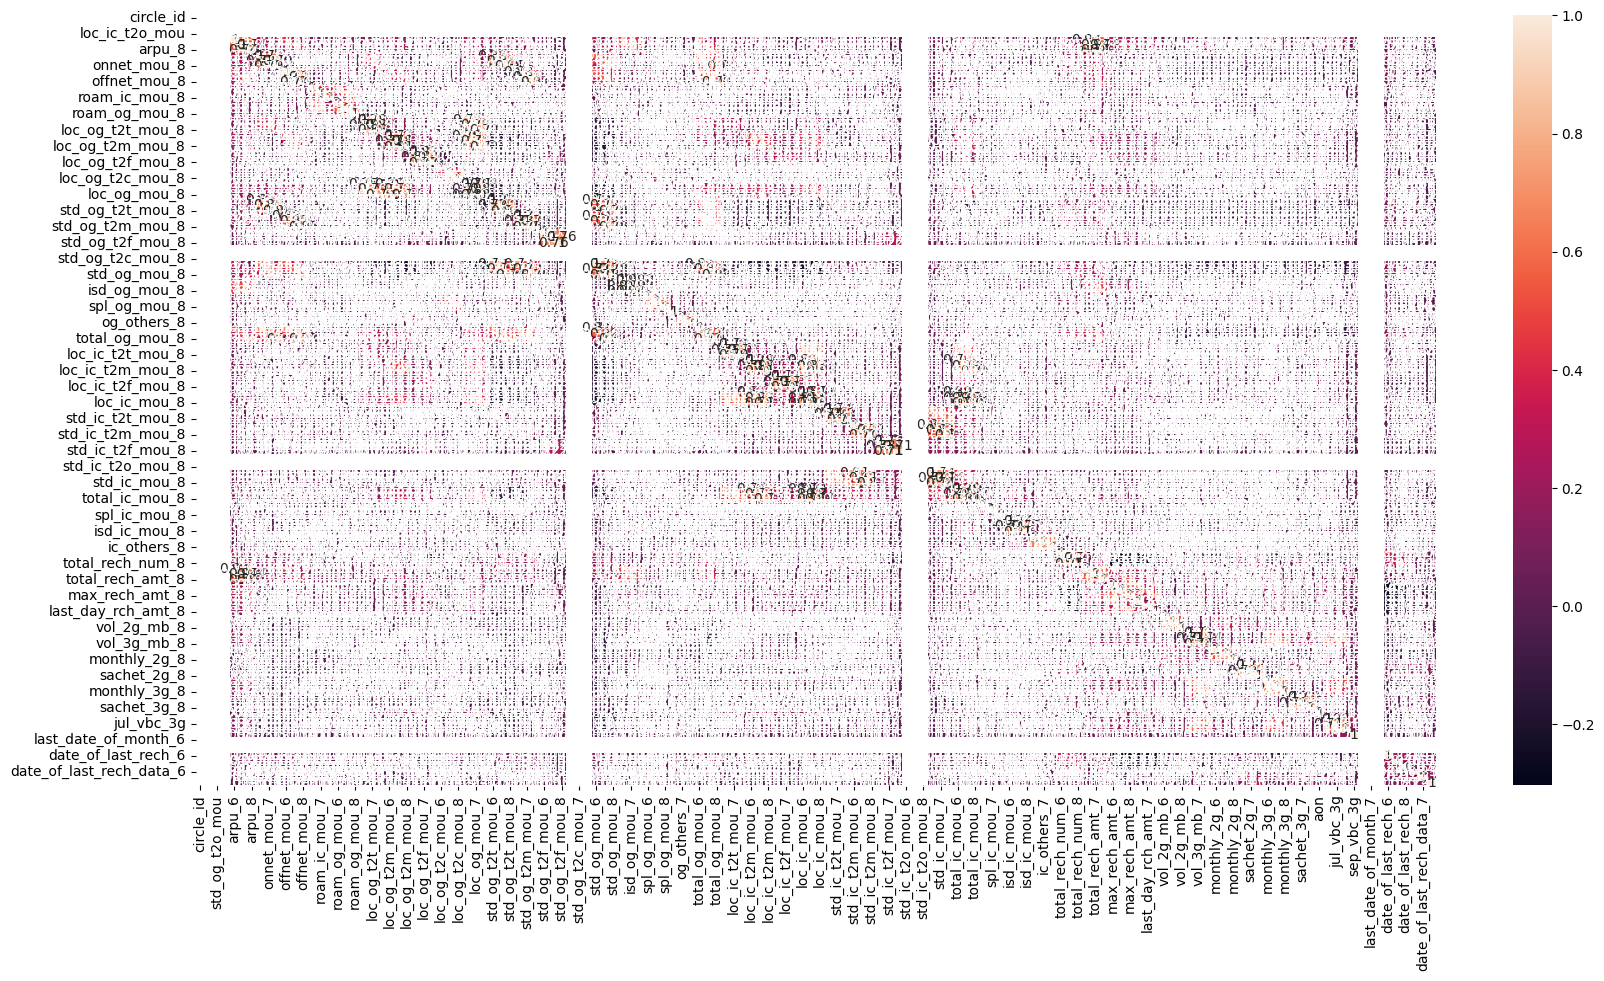

In [27]:
# Data Correlation
plt.figure(figsize = (20,10))
heat = scaled_df.corr()
sns.heatmap(heat,annot = True)
plt.show()


In [28]:
# On corelation matrix, find pair column-rơw having score > 0.3 then remove them
tmp = heat[(abs(heat)>=0.3)&(abs(heat)<1)].sum()
del_col = tmp[tmp>0].index

In [29]:
scaled_df.drop(columns=del_col, inplace=True)
scaled_df.shape

(30011, 18)

## Data Modeling

#### Dividing into train and test datasets

In [140]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_df, tag, train_size=0.7, test_size=0.3, random_state=100)

### Feature Selection -RFE

In [141]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=42)
rfe = RFE(logreg, step=15)
rfe = rfe.fit(X_train, y_train)

In [142]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('circle_id', False, 2),
 ('loc_og_t2o_mou', True, 1),
 ('std_og_t2o_mou', True, 1),
 ('loc_ic_t2o_mou', True, 1),
 ('std_og_t2c_mou_6', False, 2),
 ('std_og_t2c_mou_7', False, 2),
 ('std_og_t2c_mou_8', True, 1),
 ('og_others_6', True, 1),
 ('std_ic_t2o_mou_6', False, 2),
 ('std_ic_t2o_mou_7', False, 2),
 ('std_ic_t2o_mou_8', False, 2),
 ('spl_ic_mou_8', True, 1),
 ('aon', True, 1),
 ('sep_vbc_3g', True, 1),
 ('last_date_of_month_6', False, 2),
 ('last_date_of_month_7', False, 2),
 ('last_date_of_month_8', False, 2),
 ('date_of_last_rech_data_6', True, 1)]

In [143]:
selected_col = X_train.columns[rfe.support_]
selected_col

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_8', 'og_others_6', 'spl_ic_mou_8', 'aon', 'sep_vbc_3g',
       'date_of_last_rech_data_6'],
      dtype='object')

In [144]:
X_train[selected_col].describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,std_og_t2c_mou_8,og_others_6,spl_ic_mou_8,aon,sep_vbc_3g,date_of_last_rech_data_6
count,21007.0,21007.0,21007.0,21007.0,21007.000000,21007.000000,21007.000000,21007.000000,21007.000000
mean,0.0,0.0,0.0,0.0,-0.001371,0.004680,0.005637,-0.002971,0.002156
std,0.0,0.0,0.0,0.0,0.998120,0.970769,1.001292,0.997513,0.997285
min,0.0,0.0,0.0,0.0,-0.306941,-0.245155,-1.111580,-0.134930,-3.627046
25%,0.0,0.0,0.0,0.0,-0.306941,-0.245155,-0.803965,-0.134930,0.036169
50%,0.0,0.0,0.0,0.0,-0.306941,-0.245155,-0.348696,-0.134930,0.036169
75%,0.0,0.0,0.0,0.0,-0.306941,-0.245155,0.693091,-0.134930,0.036169
max,0.0,0.0,0.0,0.0,43.816988,10.573433,3.132474,53.703185,1.964177


In [145]:
selected_col=selected_col.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_8'])
selected_col

Index(['og_others_6', 'spl_ic_mou_8', 'aon', 'sep_vbc_3g',
       'date_of_last_rech_data_6'],
      dtype='object')

<!-- There are 8 features which should be used to build model: loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou, std_og_t2c_mou_8, og_others_6, spl_ic_mou_8, aon, sep_vbc_3g, date_of_last_rech_data_6 -->

There are 8 features which should be used to build model: og_others_6, spl_ic_mou_8, aon, sep_vbc_3g, date_of_last_rech_data_6

Try with basic model after feature selection. In this situation, we put recall in priority since we need to predict correctly to churn customer.

**We try two model: logistic regression and decision tree**

#### Logistic Regression

In [146]:
logreg.fit(X_train[selected_col], y_train)
y_pred = logreg.predict(X_test[selected_col])

In [147]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [148]:
print ('Accuracy: ', accuracy_score(y_test, y_pred))
print ('F1 score: ', f1_score(y_test, y_pred))
print ('Recall: ', recall_score(y_test, y_pred))
print ('Precision: ', precision_score(y_test, y_pred))
print ('\n clasification report:\n', classification_report(y_test,y_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy:  0.9144824522434474
F1 score:  0.0
Recall:  0.0
Precision:  0.0

 clasification report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.96      8234
           1       0.00      0.00      0.00       770

    accuracy                           0.91      9004
   macro avg       0.46      0.50      0.48      9004
weighted avg       0.84      0.91      0.87      9004


 confussion matrix:
 [[8234    0]
 [ 770    0]]


/home/hieuvo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/hieuvo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/hieuvo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/hieuvo/.local/lib/python

#### Decision Tree

In [149]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train[selected_col], y_train)
y_pred_dtc = dtc.predict(X_test[selected_col])

In [150]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc))
print ('F1 score: ', f1_score(y_test, y_pred_dtc))
print ('Recall: ', recall_score(y_test, y_pred_dtc))
print ('Precision: ', precision_score(y_test, y_pred_dtc))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc))

Accuracy:  0.9018214127054642
F1 score:  0.3168469860896445
Recall:  0.2662337662337662
Precision:  0.39122137404580154

 clasification report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      8234
           1       0.39      0.27      0.32       770

    accuracy                           0.90      9004
   macro avg       0.66      0.61      0.63      9004
weighted avg       0.89      0.90      0.89      9004


 confussion matrix:
 [[7915  319]
 [ 565  205]]


**Both of two models return bad results. That could be caused by imbalance class**

### Imbalance Class (SMOTE and SMOTETomek)
#### SMOTE

In [151]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train[selected_col], y_train)
len(X_resampled_smt)

38368

##### Logistic Regression

In [152]:
logreg_smt = LogisticRegression(random_state=42)

In [153]:
logreg_smt.fit(X_resampled_smt[selected_col], y_resampled_smt)
y_pred_smt = logreg_smt.predict(X_test[selected_col])

In [154]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_smt))
print ('F1 score: ', f1_score(y_test, y_pred_smt))
print ('Recall: ', recall_score(y_test, y_pred_smt))
print ('Precision: ', precision_score(y_test, y_pred_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_smt))

Accuracy:  0.5104398045313194
F1 score:  0.21927027984413744
Recall:  0.8038961038961039
Precision:  0.12694831829368336

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.48      0.64      8234
           1       0.13      0.80      0.22       770

    accuracy                           0.51      9004
   macro avg       0.55      0.64      0.43      9004
weighted avg       0.89      0.51      0.61      9004


 confussion matrix:
 [[3977 4257]
 [ 151  619]]


##### Decision Tree

In [155]:
# Decision Trees - SMOTE
from sklearn.tree import DecisionTreeClassifier
dtc_smt = DecisionTreeClassifier(random_state=0)
dtc_smt.fit(X_resampled_smt[selected_col], y_resampled_smt)
y_pred_dtc_smt = dtc_smt.predict(X_test[selected_col])

In [156]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_smt))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_smt))
print ('Recall: ', recall_score(y_test, y_pred_dtc_smt))
print ('Precision: ', precision_score(y_test, y_pred_dtc_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_smt))

Accuracy:  0.8265215459795646
F1 score:  0.25119846596356665
Recall:  0.34025974025974026
Precision:  0.19908814589665655

 clasification report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90      8234
           1       0.20      0.34      0.25       770

    accuracy                           0.83      9004
   macro avg       0.57      0.61      0.58      9004
weighted avg       0.87      0.83      0.85      9004


 confussion matrix:
 [[7180 1054]
 [ 508  262]]


#### SMOTETomek

In [157]:
# SMOTE+TOMEK
from imblearn.combine import SMOTETomek
smt_tmk = SMOTETomek(random_state=45)
X_resampled_smt_tmk, y_resampled_smt_tmk = smt_tmk.fit_resample(X_train[selected_col], y_train)
len(X_resampled_smt_tmk)

36412

##### Logistic Regression


In [158]:
lreg_smt_tmk = LogisticRegression()
lreg_smt_tmk.fit(X_resampled_smt_tmk, y_resampled_smt_tmk)
y_pred_smt_tmk = lreg_smt_tmk.predict(X_test[selected_col])

In [159]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_smt_tmk))
print ('F1 score: ', f1_score(y_test, y_pred_smt_tmk))
print ('Recall: ', recall_score(y_test, y_pred_smt_tmk))
print ('Precision: ', precision_score(y_test, y_pred_smt_tmk))
print ('\n clasification report:\n', classification_report(y_test,y_pred_smt_tmk))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_smt_tmk))

Accuracy:  0.5111061750333186
F1 score:  0.2195035460992908
Recall:  0.8038961038961039
Precision:  0.12710472279260782

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.48      0.64      8234
           1       0.13      0.80      0.22       770

    accuracy                           0.51      9004
   macro avg       0.55      0.64      0.43      9004
weighted avg       0.89      0.51      0.61      9004


 confussion matrix:
 [[3983 4251]
 [ 151  619]]


##### Decision Tree

In [160]:
from sklearn.tree import DecisionTreeClassifier
dtc_smt_tmk = DecisionTreeClassifier(random_state=0)
dtc_smt_tmk.fit(X_resampled_smt_tmk, y_resampled_smt_tmk)

y_pred_dtc_smt_tmk = dtc_smt_tmk.predict(X_test[selected_col])

In [161]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_smt_tmk))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_smt_tmk))
print ('Recall: ', recall_score(y_test, y_pred_dtc_smt_tmk))
print ('Precision: ', precision_score(y_test, y_pred_dtc_smt_tmk))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_smt_tmk))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_smt_tmk))

Accuracy:  0.8223011994669036
F1 score:  0.2613111726685134
Recall:  0.36753246753246754
Precision:  0.2027220630372493

 clasification report:
               precision    recall  f1-score   support

           0       0.94      0.86      0.90      8234
           1       0.20      0.37      0.26       770

    accuracy                           0.82      9004
   macro avg       0.57      0.62      0.58      9004
weighted avg       0.87      0.82      0.84      9004


 confussion matrix:
 [[7121 1113]
 [ 487  283]]


After handling with imbalaced class, the model logistic give significantly better result. **We choose logistic + SMOTETomek to build model**

Now, we can try to adjust hyper parameter of model to get the best model. In this notebook, we use **grid search**

## Hyper-parameter tuning using Cross Validation

In [162]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge

model_cv = GridSearchCV(estimator=logreg, 
             param_grid=grid,
             verbose=1,
             cv=10,
             n_jobs=-1,
             return_train_score=True)

In [163]:
model_cv.fit(X_resampled_smt_tmk, y_resampled_smt_tmk)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


/home/hieuvo/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:542: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/home/hieuvo/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/hieuvo/.local/lib/python3.10/site-packages/sklearn/base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/hieuvo/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1172, in fit
    solver = _check_solver(self.solver,

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             return_train_score=True, verbose=1)

In [164]:
cv_df = pd.DataFrame(model_cv.cv_results_)
cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.018484,0.008821,0.000000,0.000000,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.125479,0.007977,0.011660,0.001684,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",0.641680,0.648819,0.647075,0.656138,0.633617,0.654765,0.654765,0.648723,0.653941,0.644054,0.648358,0.006754,7,0.649558,0.648520,0.648531,0.647127,0.650362,0.648104,0.647158,0.648653,0.647737,0.648836,0.648458,0.000956
2,0.010598,0.001447,0.000000,0.000000,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.157978,0.013411,0.014207,0.006417,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.648819,0.651565,0.648998,0.656413,0.638835,0.653667,0.656413,0.651469,0.653667,0.642955,0.650280,0.005382,6,0.651144,0.650626,0.650697,0.650117,0.652131,0.650453,0.650056,0.650514,0.650087,0.651308,0.650713,0.000620
4,0.011947,0.003171,0.000000,0.000000,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [165]:
cv_df.sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
11,0.209761,0.041812,0.011924,0.001670,100.0,l2,"{'C': 100.0, 'penalty': 'l2'}",0.651565,0.655958,0.652568,0.658610,0.642955,0.655589,0.660258,0.655864,0.655864,0.645427,0.653466,0.005238,1,0.654348,0.653555,0.653779,0.652589,0.655091,0.653383,0.652772,0.653413,0.653413,0.654756,0.653710,0.000765
13,0.210675,0.040061,0.011100,0.001664,1000.0,l2,"{'C': 1000.0, 'penalty': 'l2'}",0.651565,0.655958,0.652568,0.658610,0.642955,0.655589,0.660258,0.655864,0.655864,0.645427,0.653466,0.005238,1,0.654348,0.653555,0.653779,0.652589,0.655091,0.653383,0.652772,0.653444,0.653413,0.654756,0.653713,0.000764
9,0.194085,0.035043,0.011954,0.001554,10.0,l2,"{'C': 10.0, 'penalty': 'l2'}",0.651840,0.655958,0.652568,0.658610,0.642955,0.655314,0.660258,0.656138,0.655864,0.645152,0.653466,0.005274,3,0.654471,0.653616,0.653749,0.652559,0.655061,0.653383,0.652772,0.653352,0.653352,0.654725,0.653704,0.000775
7,0.209054,0.037120,0.015182,0.005938,1.0,l2,"{'C': 1.0, 'penalty': 'l2'}",0.651840,0.655684,0.652568,0.659160,0.642681,0.655314,0.659709,0.655864,0.656413,0.645152,0.653438,0.005320,4,0.654318,0.653555,0.653474,0.652315,0.654939,0.653230,0.652742,0.653413,0.653383,0.654664,0.653603,0.000779
5,0.190088,0.042191,0.012782,0.002062,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.650467,0.654860,0.652568,0.661082,0.641857,0.654765,0.660258,0.654216,0.654765,0.645702,0.653054,0.005596,5,0.653708,0.653189,0.653199,0.652131,0.654908,0.653230,0.652406,0.653322,0.652894,0.654115,0.653310,0.000760


In [54]:
model_cv.best_score_

0.653465874118681

In [166]:
final_model = model_cv.best_estimator_
final_y_pred = final_model.predict(X_test[selected_col])

In [167]:
print ('Accuracy: ', accuracy_score(y_test, final_y_pred))
print ('F1 score: ', f1_score(y_test, final_y_pred))
print ('Recall: ', recall_score(y_test, final_y_pred))
print ('Precision: ', precision_score(y_test, final_y_pred))
print ('\nclasification report:\n', classification_report(y_test,final_y_pred))
print ('\nconfussion matrix:\n',confusion_matrix(y_test, final_y_pred))

Accuracy:  0.5112172367836517
F1 score:  0.21954247206951588
Recall:  0.8038961038961039
Precision:  0.12713082768535633

clasification report:
               precision    recall  f1-score   support

           0       0.96      0.48      0.64      8234
           1       0.13      0.80      0.22       770

    accuracy                           0.51      9004
   macro avg       0.55      0.64      0.43      9004
weighted avg       0.89      0.51      0.61      9004


confussion matrix:
 [[3984 4250]
 [ 151  619]]


After adjust hyperparameter, we get the best model with recall ~80%

# Data Vissualzation and Insight

In [178]:
selected_col

Index(['og_others_6', 'spl_ic_mou_8', 'aon', 'sep_vbc_3g',
       'date_of_last_rech_data_6'],
      dtype='object')

**Data visualize on unscaled data**

In [179]:
vis_data = pd.DataFrame(total_data[selected_col])
vis_data

,og_others_6,spl_ic_mou_8,aon,sep_vbc_3g,date_of_last_rech_data_6
mobile_number,,,,,
7000701601,0.00,0.0,802,0.0,20.0
7001524846,0.00,0.0,315,0.0,20.0
7002191713,0.00,0.0,2607,0.0,20.0
7000875565,0.00,0.0,511,0.0,20.0
7000187447,0.93,0.0,667,0.0,20.0
...,...,...,...,...,...
7001386760,0.00,0.0,1022,0.0,26.0
7001453306,3.08,0.0,3054,0.0,20.0
7001729035,0.00,0.0,2696,0.0,17.0


In [184]:
vis_data = pd.concat([total_data[selected_col], tag], axis=1)
vis_data.columns = ['og_others_6', 'spl_ic_mou_8', 'aon', 'sep_vbc_3g',
       'date_of_last_rech_data_6','tag']
vis_data.head(2)

,og_others_6,spl_ic_mou_8,aon,sep_vbc_3g,date_of_last_rech_data_6,tag
mobile_number,,,,,,
7000701601,0.0,0.0,802,0.0,20.0,1
7001524846,0.0,0.0,315,0.0,20.0,0


In [185]:
(vis_data.groupby('tag').count()*100/vis_data.shape[0]).round(2)

,og_others_6,spl_ic_mou_8,aon,sep_vbc_3g,date_of_last_rech_data_6
tag,,,,,
0,91.36,91.36,91.36,91.36,91.36
1,8.64,8.64,8.64,8.64,8.64


In [186]:
# Churn customer data
vis_data.loc[vis_data['tag']==1].describe()

,og_others_6,spl_ic_mou_8,aon,sep_vbc_3g,date_of_last_rech_data_6,tag
count,2593.000000,2593.000000,2593.000000,2593.000000,2593.000000,2593.0
mean,0.897106,0.013974,869.236406,0.306008,19.786348,1.0
std,2.506147,0.128917,747.643178,10.180267,4.533723,0.0
min,0.000000,0.000000,180.000000,0.000000,1.000000,1.0
25%,0.000000,0.000000,355.000000,0.000000,20.000000,1.0
50%,0.000000,0.000000,615.000000,0.000000,20.000000,1.0
75%,0.699876,0.028552,1042.000000,0.000000,20.000000,1.0
max,43.090000,6.230000,3670.000000,493.410000,30.000000,1.0


In [187]:
# Not Churn customer data
vis_data.loc[vis_data['tag']==0].describe()

,og_others_6,spl_ic_mou_8,aon,sep_vbc_3g,date_of_last_rech_data_6,tag
count,27418.000000,27418.000000,27418.000000,27418.000000,27418.000000,27418.0
mean,0.681224,0.029931,1301.404844,7.154397,19.814866,0.0
std,2.256827,0.115128,985.956668,50.750466,5.244409,0.0
min,0.000000,0.000000,180.000000,0.000000,1.000000,0.0
25%,0.000000,0.000000,487.000000,0.000000,20.000000,0.0
50%,0.000000,0.000000,958.000000,0.000000,20.000000,0.0
75%,0.000000,0.000000,2014.750000,0.000000,20.000000,0.0
max,100.610000,1.260000,4321.000000,2618.570000,30.000000,0.0


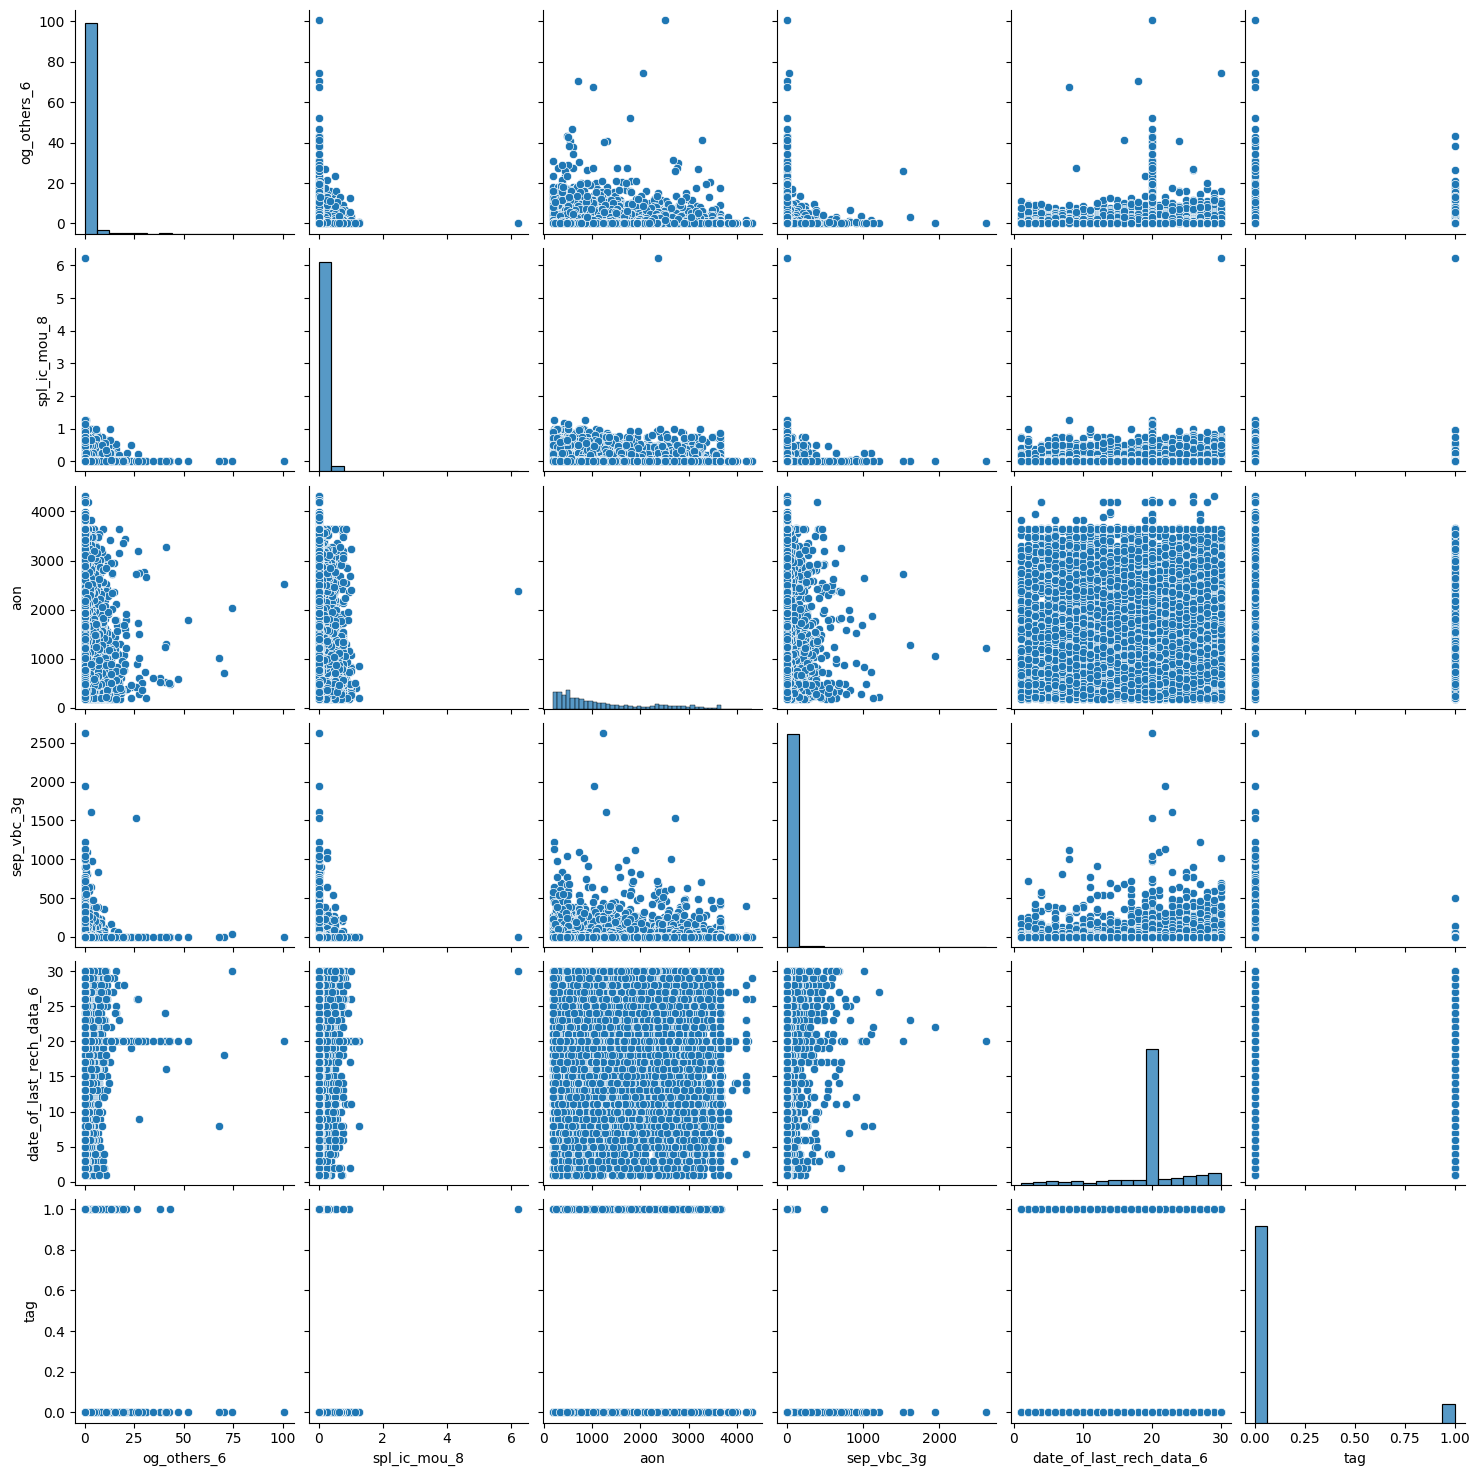

In [194]:
sns.pairplot(vis_data)
plt.show()

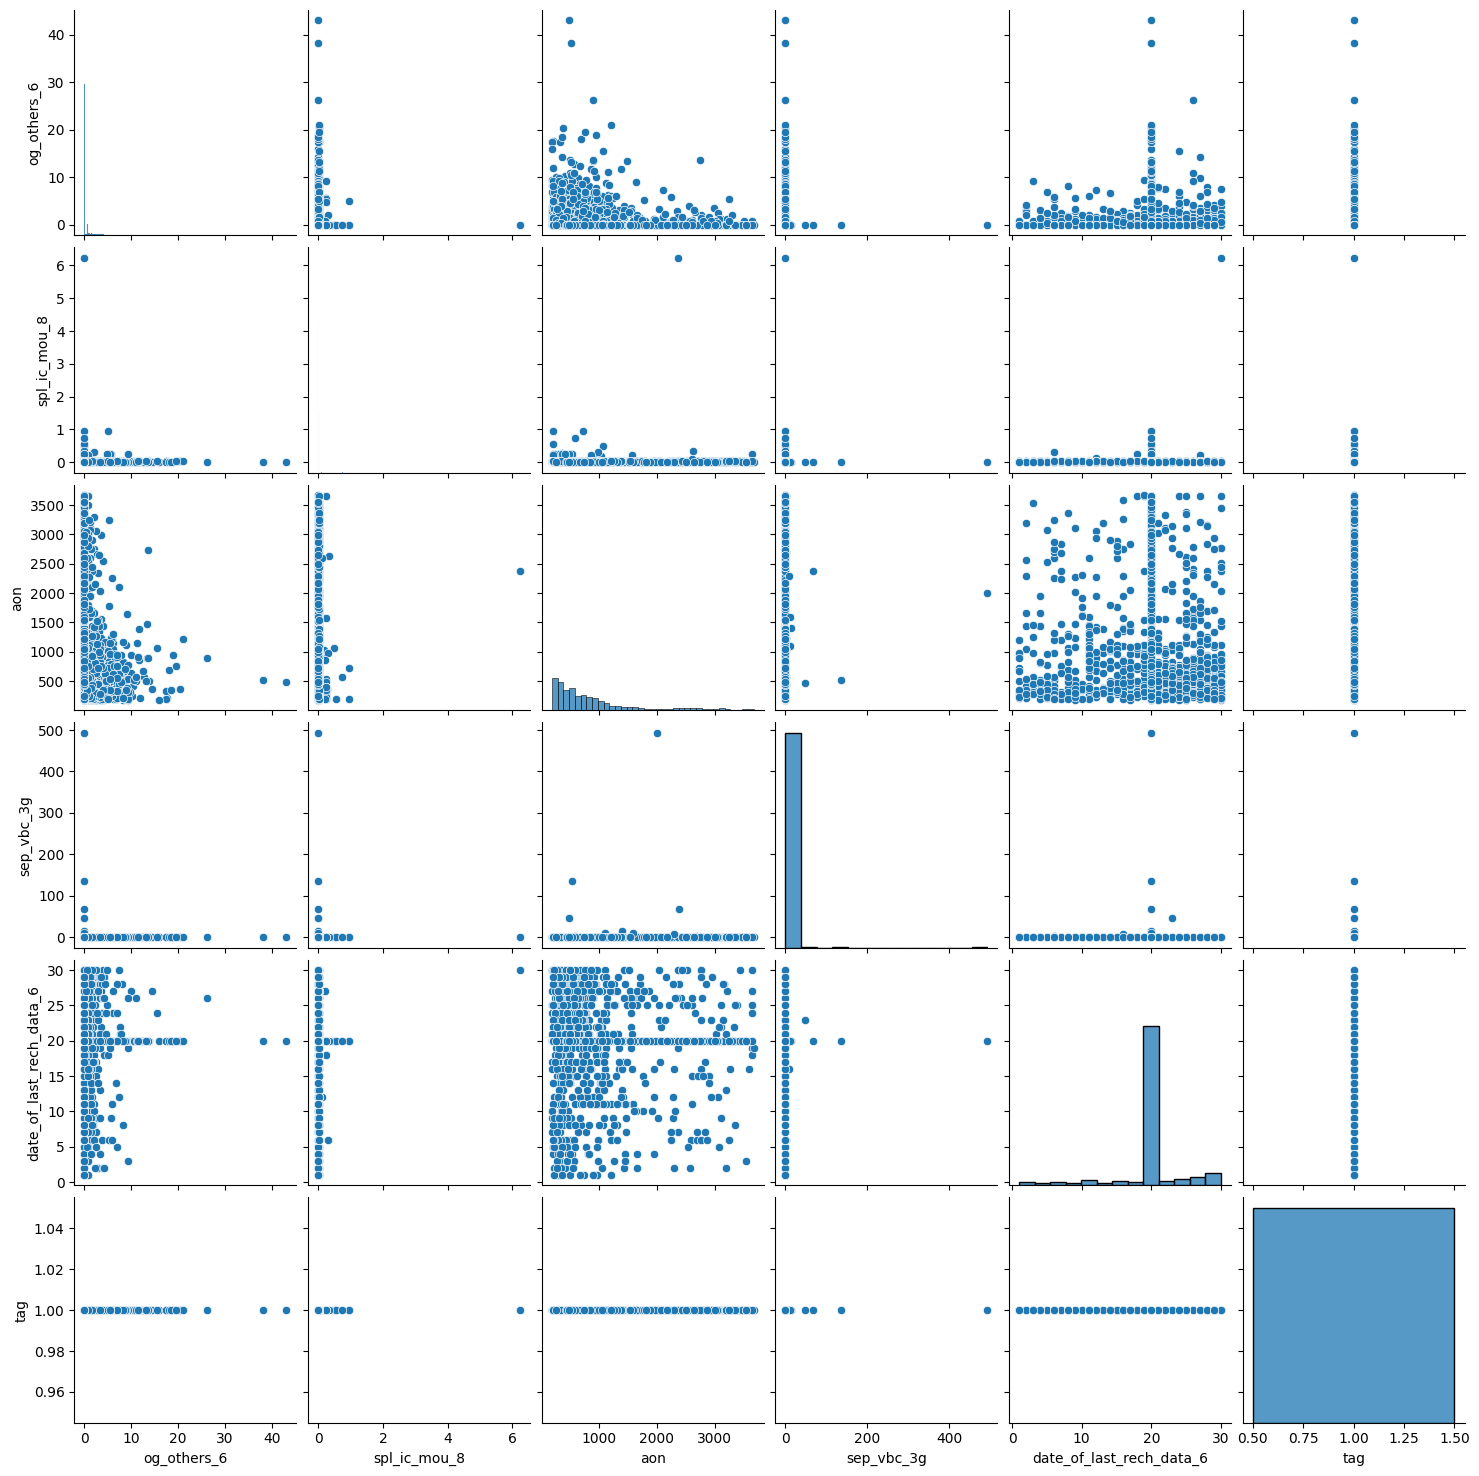

In [198]:
sns.pairplot(vis_data.loc[vis_data['tag']==1])
plt.show()

- In the chart and summary table, we find no linear relation between tag and any special attribute

- Base on summary table, customers who has low outgoing calls < 43.9, special calls < 6.2 and cost using 3g less than 493 have higher potential to churn

- Moreover, customer have highe incoming calls choose to churn

- Volume based cost, 3G network, Incoming calls, Outgoing calls, Special calls, Date of last recharged data on June play important role in our present busines probel -> need to tracking on them more for inspect customer behaviour

- Conduct promotion, discount, marketing strategy to encourage 'churn-potential' customer to raise their using.